<a href="https://colab.research.google.com/github/MustafaYosoufi/Data_Visualization/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Machine Learning?

Machine Learning (ML) is a field of computer science that enables computers to learn from data and improve their performance on tasks without being explicitly programmed. It involves algorithmic methods that identify patterns, make decisions, or generate predictions from data.

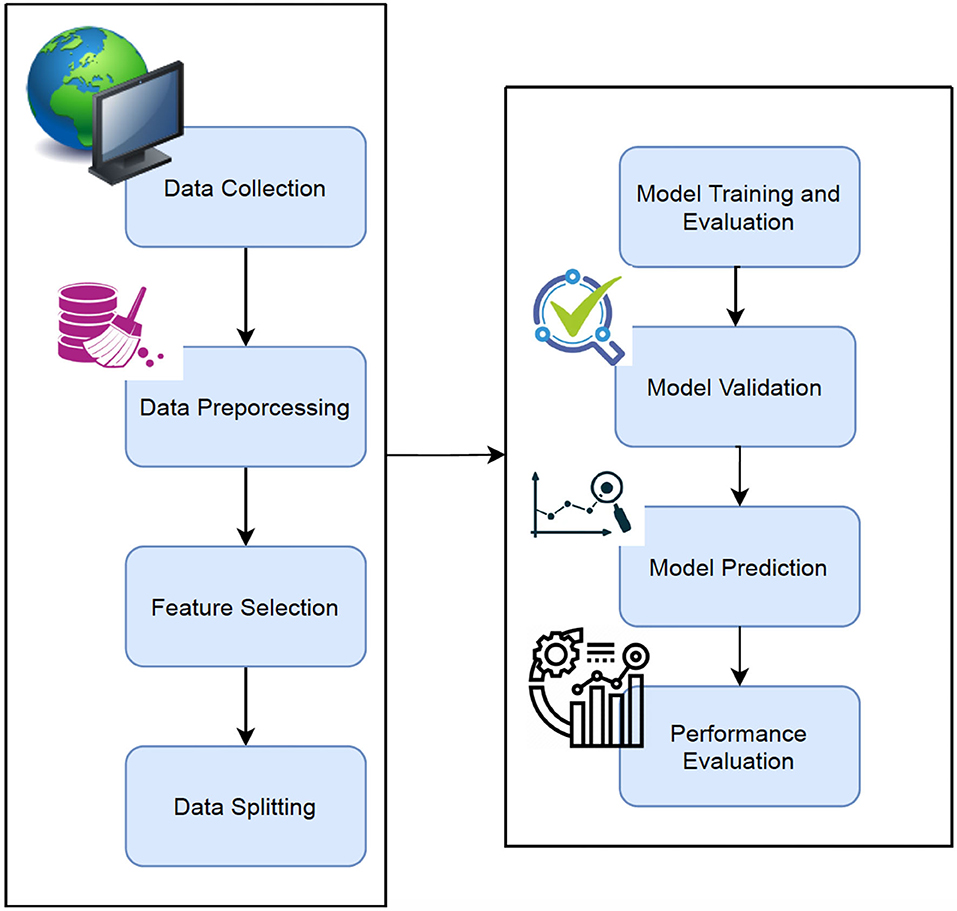


# Categories of Machine Learning

Machine Learning can be broadly categorized into three main types:

- **Supervised Learning:** The model learns from labeled data. Examples: classification, regression.
- **Unsupervised Learning:** The model tries to identify patterns in unlabeled data. Examples: clustering, dimensionality reduction.
- **Reinforcement Learning:** The model learns through trial and error by interacting with an environment and receiving rewards or penalties.

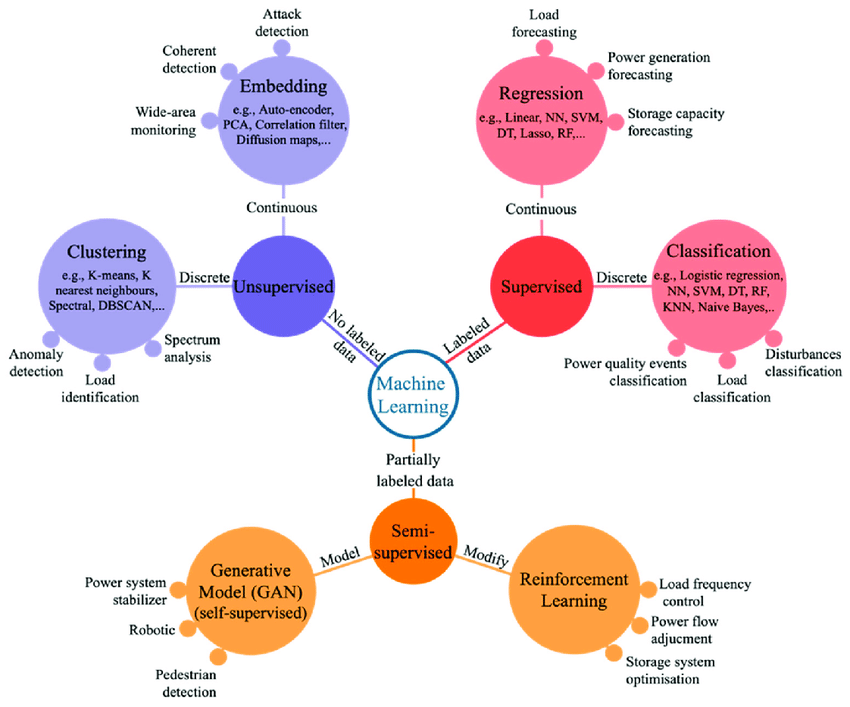


# Overview of the ML Pipeline

A typical ML pipeline involves:

1. Data Collection
2. Data Preprocessing & Feature Engineering
3. Model Selection & Training
4. Model Evaluation & Validation
5. Model Tuning & Optimization
6. Deployment & Maintenance

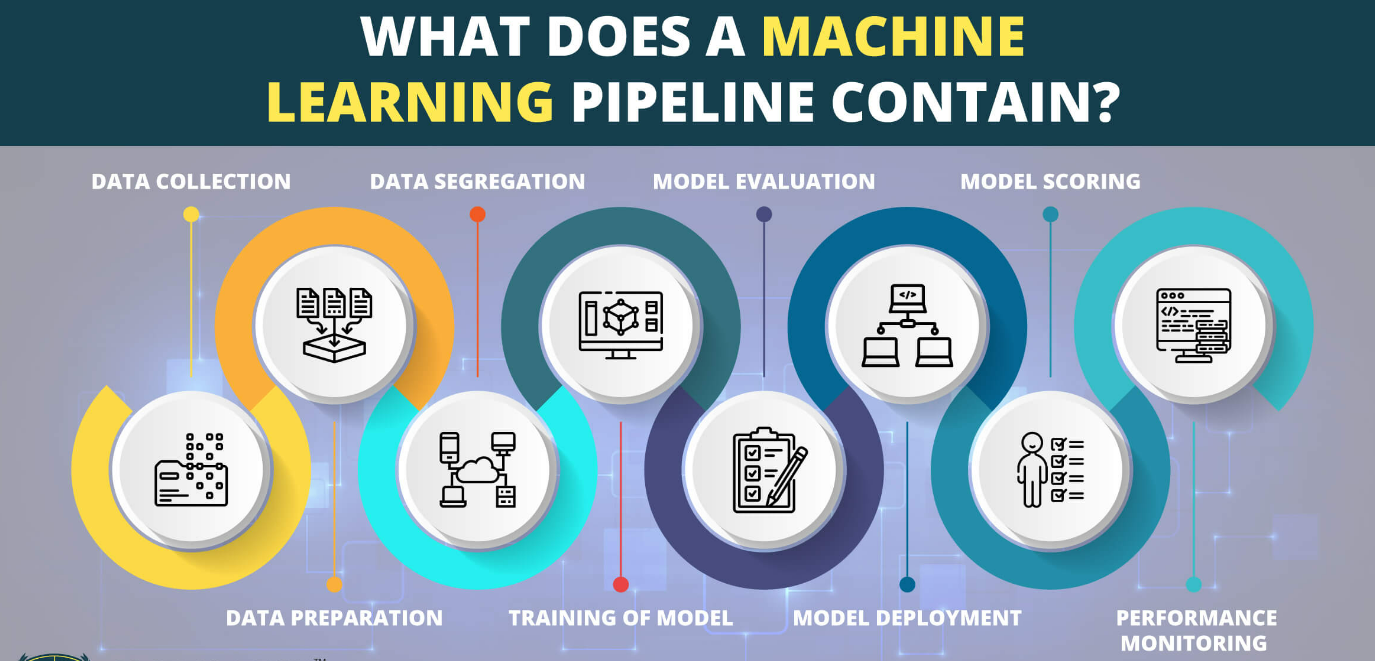


# **Data Preprocessing and Feature Engineering**

## **Handling Missing Data, Outliers, and Imbalances**

Real-world datasets often contain missing values, outliers, and class imbalances.

- **Missing Data:** Can be handled by imputation (mean, median, mode) or dropping rows/columns.
- **Outliers:** Can be handled by capping values, removing outliers, or using robust scalers.
- **Imbalanced Data:** Techniques include oversampling minority classes (e.g., SMOTE), undersampling majority class, or using class-weighted models.



In [ ]:
import pandas as pd
import numpy as np

# Example dataset with missing values
data = {
    'Feature1': [1.2, 2.4, np.nan, 3.1, 4.7, np.nan],
    'Feature2': [3, 5, 2, 5, 7, 9],
    'Target': [0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Impute missing values with mean for Feature1
df['Feature1'].fillna(df['Feature1'].mean(), inplace=True)

print("\nAfter Imputation:")
print(df)


Original Data:
   Feature1  Feature2  Target
0       1.2         3       0
1       2.4         5       1
2       NaN         2       0
3       3.1         5       1
4       4.7         7       1
5       NaN         9       0

After Imputation:
   Feature1  Feature2  Target
0      1.20         3       0
1      2.40         5       1
2      2.85         2       0
3      3.10         5       1
4      4.70         7       1
5      2.85         9       0


<ipython-input-1-3efd6d1f1690>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Feature1'].fillna(df['Feature1'].mean(), inplace=True)


## **Feature Scaling and Encoding**

- **Feature Scaling:** Ensures all features have a similar range, improving model stability. Common methods: Standardization (Z-score), Min-Max Scaling.
- **Encoding Categorical Variables:** Techniques include One-Hot Encoding, Label Encoding.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assume df has a categorical feature and a numerical feature
df['Category'] = ['A', 'B', 'A', 'C', 'B', 'A']
X = df[['Feature1', 'Feature2', 'Category']]
y = df['Target']

# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['Category'])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
X_scaled_df.head()


,Feature1,Feature2,Category_A,Category_B,Category_C
0,-1.596359e+00,-0.926212,1.0,-0.707107,-0.447214
1,-4.353706e-01,-0.071247,-1.0,1.414214,-0.447214
2,-4.296520e-16,-1.353694,1.0,-0.707107,-0.447214
3,2.418726e-01,-0.071247,-1.0,-0.707107,2.236068
4,1.789857e+00,0.783718,-1.0,1.414214,-0.447214


## **Feature Selection & Dimensionality Reduction**

- **Feature Selection:** Choose features most relevant to the target (e.g., using statistical tests, feature importance from models).
- **Dimensionality Reduction:** Reduces the number of features while retaining structure (e.g., PCA).

# **Supervised Learning: Regression**

## **Linear Regression & Polynomial Regression**

- **Linear Regression:** Fits a linear model to the data.
- **Polynomial Regression:** Captures nonlinear relationships by adding polynomial terms.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Using the previously processed data (X_scaled_df, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)


Coefficients: [ 1.24653320e-01 -1.94289029e-16 -2.51462635e-01  1.29147449e-01
  1.74012491e-01]
Intercept: 0.42060442370189166


## Regularization Techniques: Ridge, Lasso, Elastic Net

Regularization helps prevent overfitting by penalizing large coefficients:

- **Ridge:** L2 penalty
- **Lasso:** L1 penalty (performs feature selection)
- **Elastic Net:** Combination of L1 and L2

## **Evaluation Metrics for Regression**

Common regression metrics:
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 0.058269188148539916
MAE: 0.23818672889432507
R²: 0.7669232474058403


## **Supervised Learning: Classification**

## **Logistic Regression, Decision Trees, Random Forests**

- **Logistic Regression:** Predicts probabilities of classes using the logistic function.
- **Decision Trees:** Splits data based on feature values to create branches.
- **Random Forests:** Ensemble of decision trees to improve generalization.

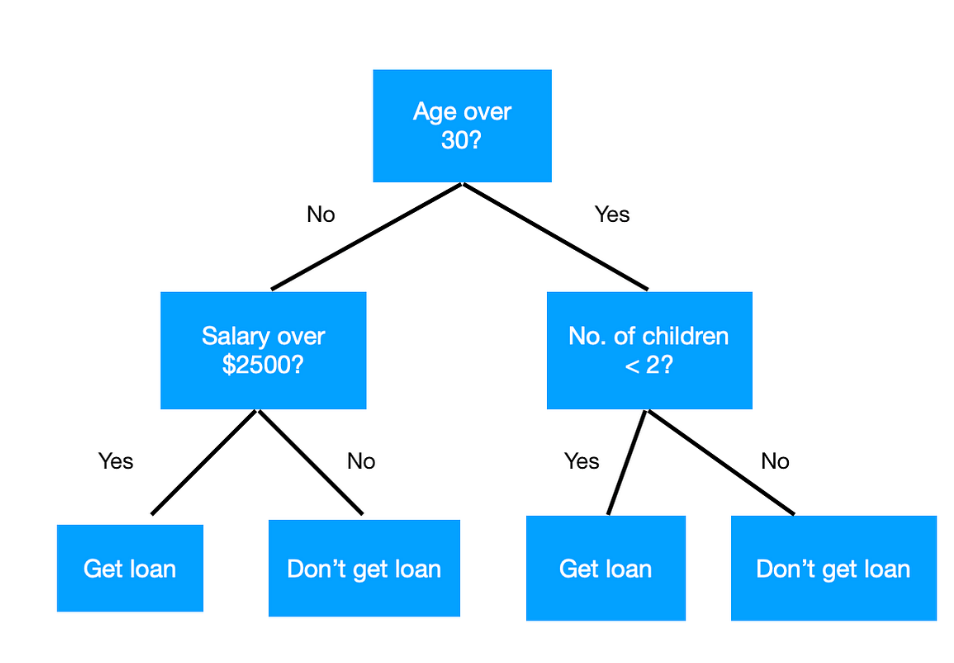

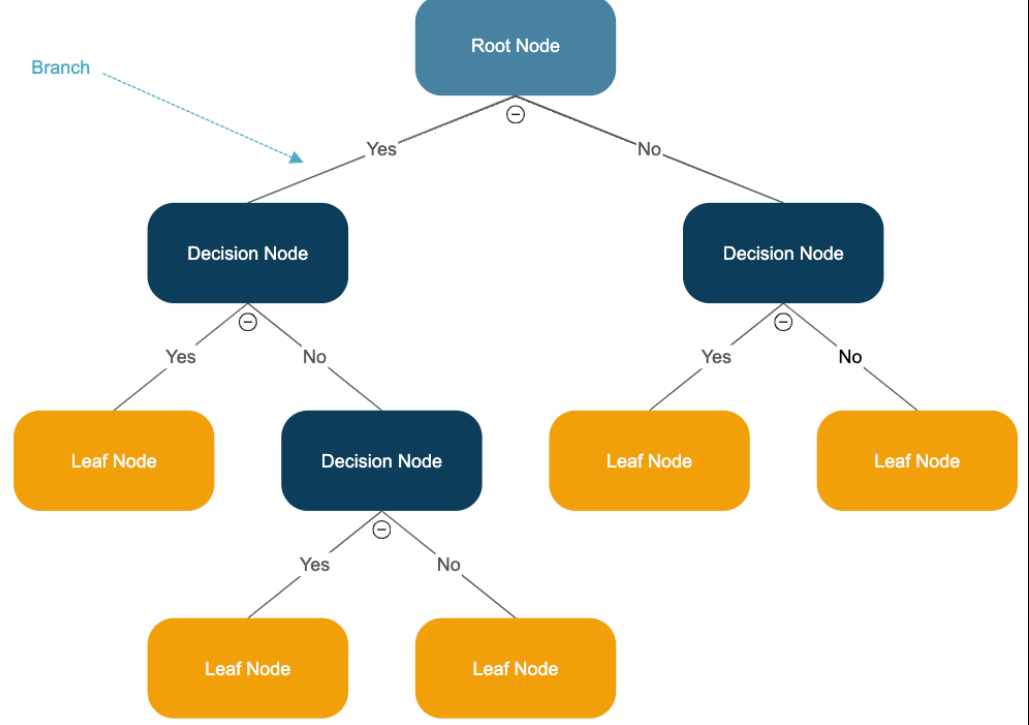

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
print("Decision Tree Accuracy:", dt_clf.score(X_test, y_test))


Decision Tree Accuracy: 0.5


## **Support Vector Machines (SVM)**

SVM finds the optimal hyperplane that separates classes with maximum margin.

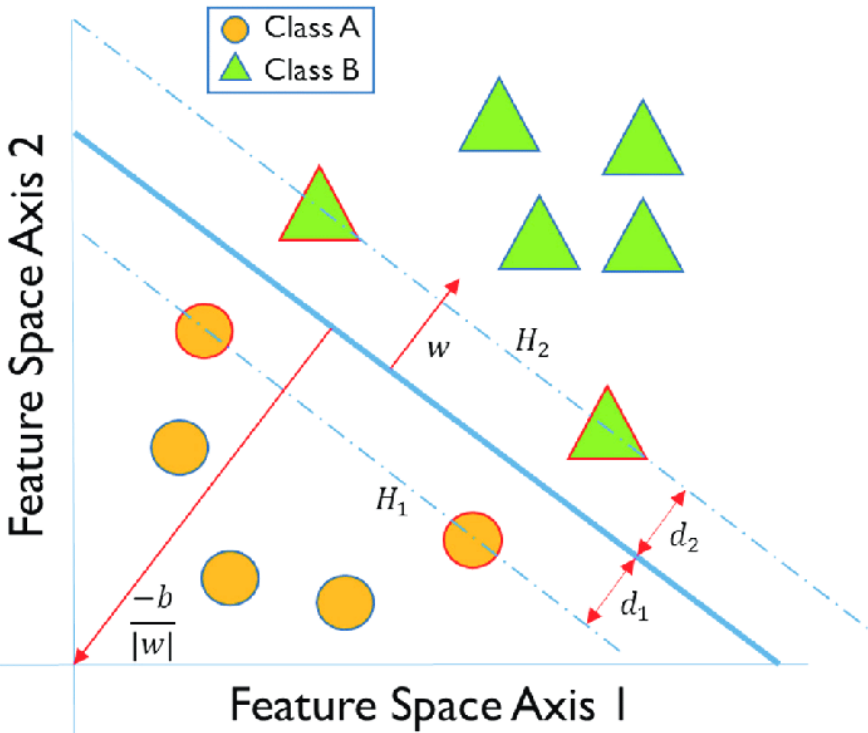

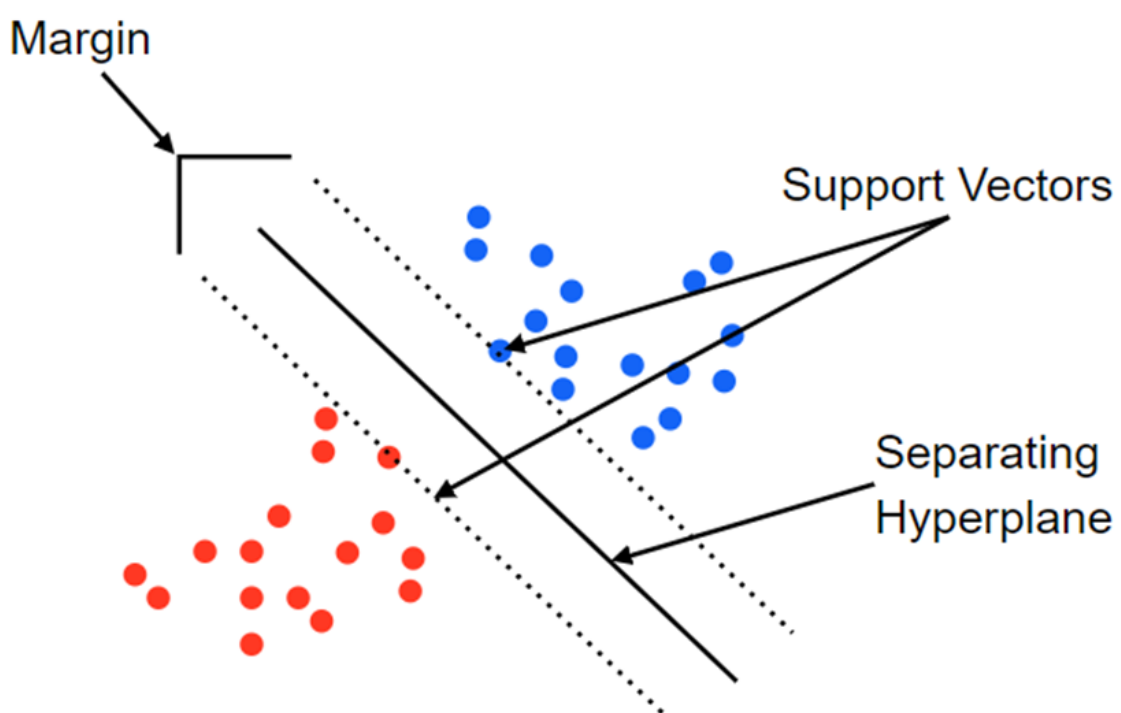

## **Evaluation Metrics for Classification**

Common classification metrics:
- **Accuracy**
- **Precision, Recall, F1-Score**
- **Confusion Matrix**
- **ROC Curve and AUC**

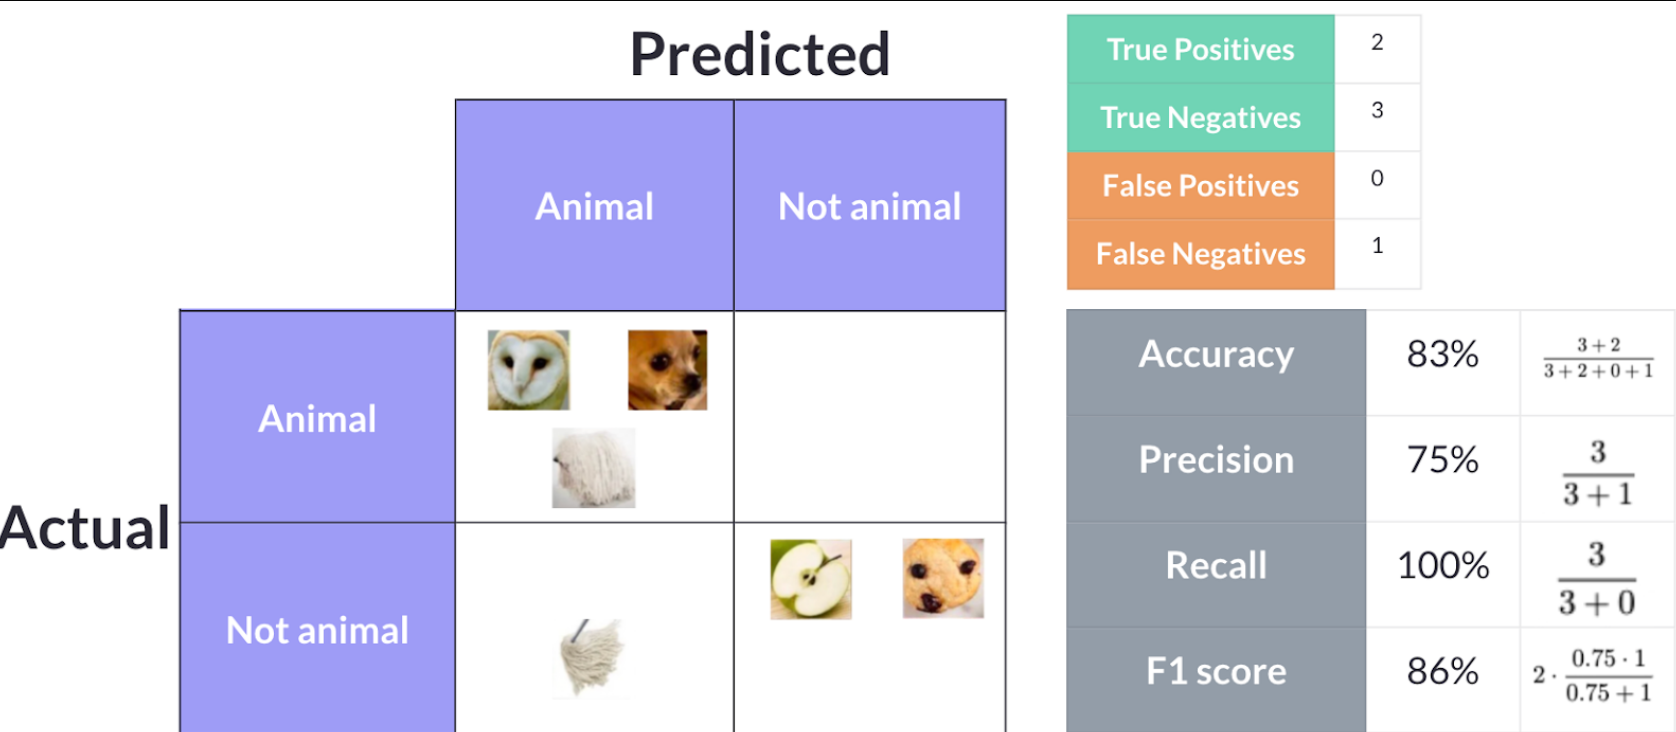

# **Unsupervised Learning**

## **Clustering (K-Means, Hierarchical)**

- **K-Means:** Partitions data into K clusters.
- **Hierarchical Clustering:** Builds a hierarchy of clusters.

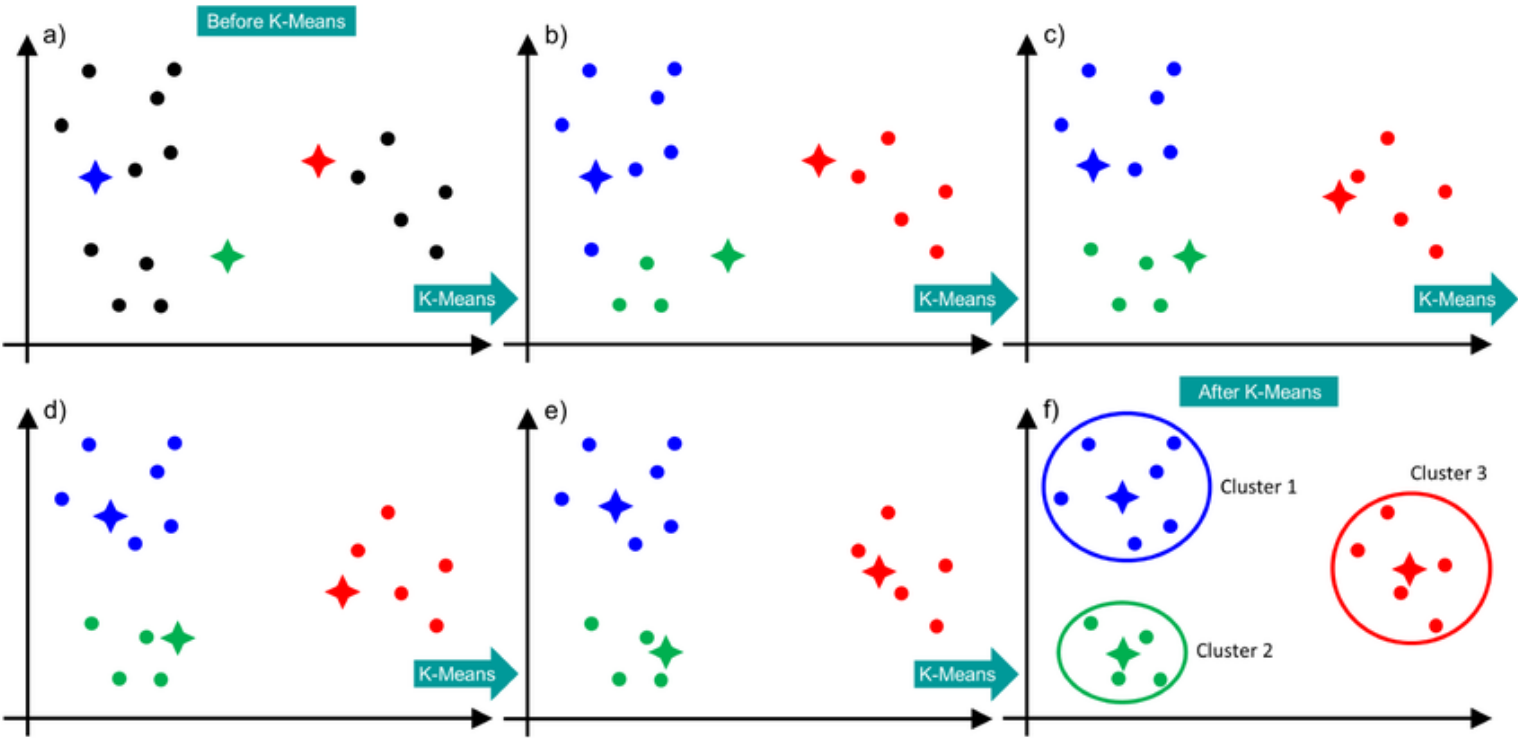

## **Density-Based Clustering (DBSCAN)**

**DBSCAN:** Groups data points that are closely packed together, marking as outliers points that lie alone in low-density regions.

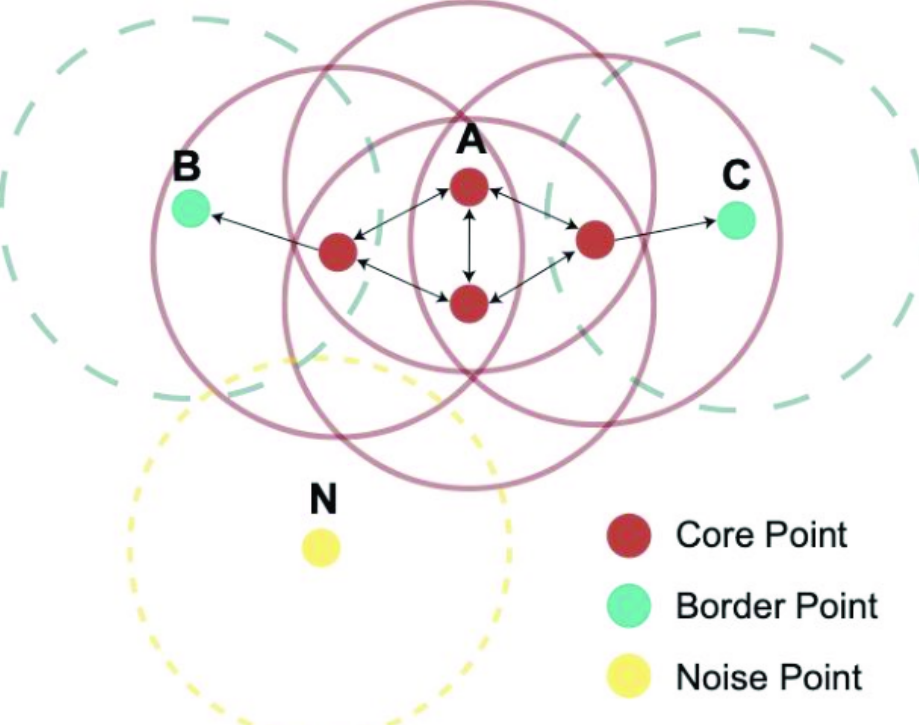

## **Model Evaluation, Validation, and Hyperparameter Tuning**

### **Train/Validation/Test Splits**

- **Train Set:** Used to fit the model.
- **Validation Set:** Used to tune hyperparameters.
- **Test Set:** Used for final unbiased evaluation.

### **Cross-Validation**

Cross-validation splits data into multiple folds, training and testing on different folds to get a more stable estimate of performance.

### **Hyperparameter Tuning (Grid, Random Search)**

- **Grid Search:** Tries all combinations of given hyperparameters.
- **Random Search:** Samples random combinations, more efficient for large search spaces.

# **Ensemble Methods**

## **Bagging & Boosting (AdaBoost, Gradient Boosting, XGBoost)**

**Bagging (Bootstrap Aggregating):** Trains multiple models (e.g., decision trees) on bootstrap samples and aggregates their predictions (e.g., by averaging).

**Boosting:** Iteratively trains models, where each subsequent model focuses on the errors of the previous ones. Examples: AdaBoost, Gradient Boosting, XGBoost.

## **Stacking and Blending**

**Stacking:** Combines multiple models' predictions using a meta-model. The outputs of base learners are used as inputs to a second-level classifier/regressor.

**Blending:** Similar idea but uses a hold-out set to blend predictions.

# **Handling Complex Data Types**

## **Time Series Data**

Time series data involves observations over time. Approaches include:
- Feature extraction (lags, rolling means)
- Modeling techniques: ARIMA, LSTM
- Handling trend and seasonality

In [ ]:
import pandas as pd
import numpy as np

# Example time series
dates = pd.date_range('2020-01-01', periods=10, freq='D')
values = np.random.randn(10).cumsum()

ts_df = pd.DataFrame({'Date': dates, 'Value': values})
ts_df['Value_lag1'] = ts_df['Value'].shift(1)
ts_df['RollingMean3'] = ts_df['Value'].rolling(window=3).mean()
ts_df.dropna(inplace=True)
ts_df.head()


,Date,Value,Value_lag1,RollingMean3
2,2020-01-03,1.986586,2.368988,1.488407
3,2020-01-04,1.990998,1.986586,2.115524
4,2020-01-05,2.082733,1.990998,2.020106
5,2020-01-06,3.280730,2.082733,2.451487
6,2020-01-07,5.061428,3.280730,3.474964


## **Text Data (NLP Basics, TF-IDF, Word Embeddings)**

For text data:
- Convert text to tokens
- TF-IDF for weighting words
- Word embeddings (e.g., Word2Vec, GloVe) capture semantic meaning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Machine learning is fascinating",
    "Deep learning builds on machine learning",
    "Natural language processing is a part of machine learning"
]

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


,builds,deep,fascinating,is,language,learning,machine,natural,of,on,part,processing
0,0.000000,0.000000,0.66284,0.504107,0.000000,0.391484,0.391484,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.459115,0.459115,0.00000,0.000000,0.000000,0.542321,0.271161,0.000000,0.000000,0.459115,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.303578,0.399169,0.235756,0.235756,0.399169,0.399169,0.000000,0.399169,0.399169


## **Image Data (Basic Preprocessing, CNN Introduction)**

- Image preprocessing may include resizing, normalization.
- Convolutional Neural Networks (CNNs) learn spatial hierarchies of features directly from images.

# **Introduction to Neural Networks and Deep Learning**

## **CNN**

CNNs use convolutional layers to detect features in images. They are widely used in computer vision tasks like classification or object detection.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('/content/soil_measures (2).csv')

In [ ]:
data

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [ ]:
data.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [ ]:
data.crop.value_counts()

,count
crop,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['crop_encoded'] = label_encoder.fit_transform(data['crop'])
data

,N,P,K,ph,crop,crop_encoded
0,90,42,43,6.502985,rice,20
1,85,58,41,7.038096,rice,20
2,60,55,44,7.840207,rice,20
3,74,35,40,6.980401,rice,20
4,78,42,42,7.628473,rice,20
...,...,...,...,...,...,...
2195,107,34,32,6.780064,coffee,5
2196,99,15,27,6.086922,coffee,5
2197,118,33,30,6.362608,coffee,5
2198,117,32,34,6.758793,coffee,5


In [ ]:
X = data[['N', 'P', 'K', 'ph']]
y = data['crop_encoded']

In [ ]:
classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
feature_scores = {}
for feature in X.columns:
    scores = cross_val_score(classifier, X[[feature]], y, cv=5, scoring='accuracy')
    feature_scores[feature] = scores.mean()

feature_scores


{'N': 0.16045454545454546,
 'P': 0.18727272727272726,
 'K': 0.2881818181818182,
 'ph': 0.13499999999999998}

In [ ]:
data.groupby('crop')['K'].mean()

,K
crop,
apple,199.89
banana,50.05
blackgram,19.24
chickpea,79.92
coconut,30.59
coffee,29.94
cotton,19.56
grapes,200.11
jute,39.99


In [ ]:
data2  = pd.read_csv('/content/apple_quality.csv')

In [ ]:
data2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
data2 = data2.drop(columns=['A_id'])


KeyError: "['A_id'] not found in axis"

In [ ]:
data2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [ ]:
data2['Acidity']= pd.to_numeric(data2['Acidity'], errors='coerce')


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.2+ KB


In [ ]:
missing_values = data2.isnull().sum()
print(missing_values)

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64


In [ ]:
data2 = data2.dropna()

In [ ]:
data2.Quality.value_counts()

,count
Quality,
good,2004
bad,1996


In [ ]:
data2['Quality'] = data2['Quality'].map({'bad': 0, 'good': 1})

<ipython-input-26-a67963ad2cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Quality'] = data2['Quality'].map({'bad': 0, 'good': 1})


In [ ]:
data2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [ ]:
X = data2.drop(columns=['Quality'])
y = data2['Quality']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, missing_values